# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)


data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [18]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

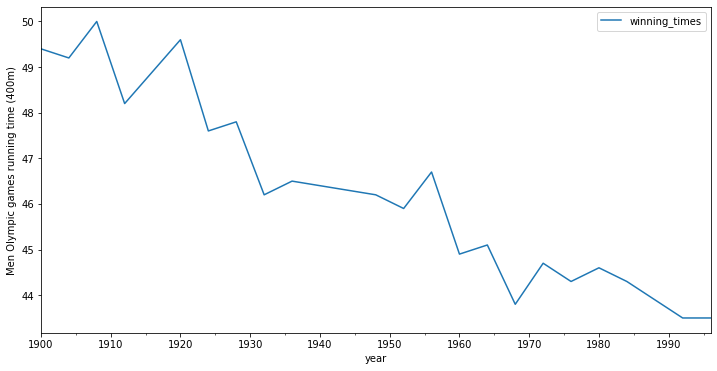

In [19]:
# Plot the time series
data.plot(figsize=(12,6), ylabel = "Men Olympic games running time (400m)");

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [20]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

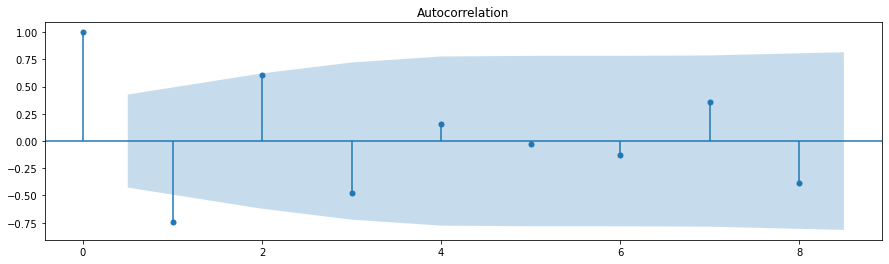

In [46]:
# Plot the ACF
fig, ax = plt.subplots(figsize = (15,4))
plot_acf(data_diff, ax = ax, lags = 8);


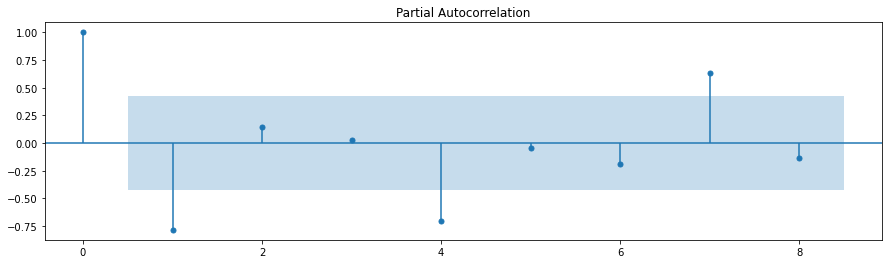

In [47]:
# Plot the PACF
fig, ax = plt.subplots(figsize = (15,4))
plot_pacf(data_diff, ax = ax, lags = 8);


Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

## Model 1

In [44]:
# Instantiate and fit AR(1) model to the simulated data
mod_arma = ARIMA(data_diff, order=(1,0,0))

# Fit the model to data
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Mon, 29 Aug 2022   AIC                             46.107
Time:                        14:11:57   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.0

## Model 2

In [41]:
# Instantiate and fit MA(1) model to the simulated data
mod_arma = ARIMA(data_diff, order=(0,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -22.443
Date:                Mon, 29 Aug 2022   AIC                             50.885
Time:                        14:00:13   BIC                             54.019
Sample:                    12-31-1904   HQIC                            51.565
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3053      0.059     -5.201      0.000      -0.420      -0.190
ma.L1         -0.7390      0.282     -2.620      0.009      -1.292      -0.186
sigma2         0.4780      0.214      2.232      0.0

## Model 3

In [42]:
# Instantiate and fit AR(1) & MA(1) model to the simulated data
mod_arma = ARIMA(data_diff, order=(1,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Mon, 29 Aug 2022   AIC                             47.916
Time:                        14:04:54   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.349      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.6

## What is your final model? Why did you pick this model?

### Model 1:
- AIC = 46.107
- BIC = 49.241

### Model 2:
- AIC = 50.885
- BIC = 54.019

### Model 3:
- AIC = 47.916
- BIC = 52.094

AIC is a fined technique based on in-sample fit to estimate the likelihood of a model to predict/estimate the future values.

BIC is another criteria for model selection that measures the trade-off between model fit and complexity of the model.

A lower AIC or BIC value indicates a better fit.

__Model 1__  at AR(1) is the final and best model. This is because judging by either AIC or BIC, it has the lowest values


## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 